<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/decisionTreeBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

In [3]:
S,s_no,s_yes=14,4,10

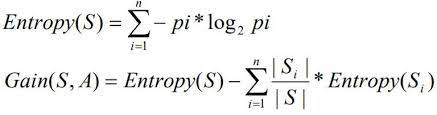

In [5]:
entro_total=(-4/14*math.log2(4/14))+(-10/14*math.log2(10/14))
entro_total

0.863120568566631

In [6]:
S,s_no,s_yes=5,1,4
entro_rainy=(-s_no/S*math.log2(s_no/S))+(-s_yes/S*math.log2(s_yes/S))
entro_rainy

0.7219280948873623

In [7]:
S,s_no,s_yes=5,3,2
entro_sunny=(-s_no/S*math.log2(s_no/S))+(-s_yes/S*math.log2(s_yes/S))
entro_sunny

0.9709505944546686

In [9]:
S=14

In [10]:
gain=entro_total-((4/S*0)+(5/S*entro_rainy)+(5/S*entro_sunny))
gain

0.2585210366587628

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/PlayTennis.csv")
df.head(15)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [13]:
df.shape

(14, 5)

In [14]:
#Label Encoding (Manual)
df['Outlook']=df['Outlook'].map({'Sunny' :0,'Overcast':1,'Rain':2})
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes


In [15]:
#Label Encoding(Library sklearn)
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
columns=['Temperature','Humidity','Wind',	'Play Tennis']
df[columns]=df[columns].apply(lambda x :le.fit_transform(x))
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,1,0,1,0
1,0,1,0,0,0
2,1,1,0,1,1
3,2,2,0,1,1
4,2,0,1,1,1


In [ ]:
#Split fiture->target
X=df.drop(columns='Play Tennis')
y=df['Play Tennis']

In [34]:
#Splitting train-test
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [30]:
#Fit model
dc=tree.DecisionTreeClassifier(criterion='entropy')
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
y_pred=dc.predict(x_test)

In [32]:
#Evaluasi
accuracy=accuracy_score(y_test,y_pred)
presisi=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Akurasi model {accuracy*100}")
print(f"Presisi model {presisi*100}")
print(f"Recall model {recall*100}")

Akurasi model 66.66666666666666
Presisi model 100.0
Recall model 50.0


In [ ]:
#KNN

In [38]:
#Fit model
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred=knn.predict(x_test)

In [40]:
#Evaluasi
accuracy=accuracy_score(y_test,y_pred)
presisi=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Akurasi model {accuracy*100}")
print(f"Presisi model {presisi*100}")
print(f"Recall model {recall*100}")

Akurasi model 66.66666666666666
Presisi model 100.0
Recall model 50.0


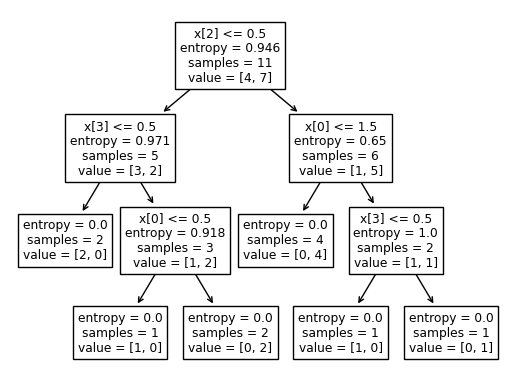

In [42]:
tree.plot_tree(dc);